### 第1步：导入库

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD

### 第2步：加载历史数据文件

In [2]:
dataset = pd.read_csv("datasets_8388_11883_IBM_2006-01-01_to_2018-01-01.csv", 
                       index_col='Date', parse_dates=['Date'])

In [3]:
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [4]:
dataset.shape

(3020, 6)

In [51]:
# 检查数据是否有缺失值
train_set = dataset[:'2016'].iloc[:, 1:2].values # 训练集，获取到第一列的数据
test_set = dataset['2017':].iloc[:,1:2].values # 测试集，获取到第一列的数据

In [52]:
train_set.shape

(2769, 1)

In [53]:
test_set.shape

(251, 1)

### 第3步：定义显示函数

In [49]:
def plot_predictions(test_result, predict_restult):
    """
    test_result: 真实值
    predict_result: 预测值
    """
    plt.plot(test_result, color='red', label='IBM True Stock Price')
    plt.plot(predict_restult, color='blue', label="IMB prdicted Stock Price")
    plt.title("IBM Stock Price")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend() # 给图加上图例
    plt.show()

### 第4步：绘制训练集和测试集的数据

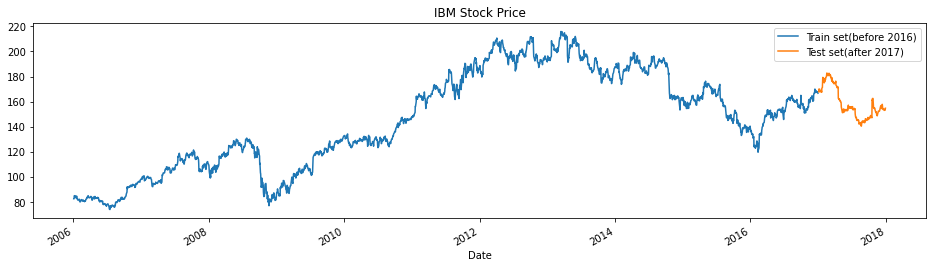

In [10]:
dataset['High'][:"2016"].plot(figsize=(16, 4), legend=True)
dataset['High']["2017":].plot(figsize=(16, 4), legend=True)
plt.title("IBM Stock Price")
plt.legend(['Train set(before 2016)', 'Test set(after 2017)'])
plt.show()

In [12]:
# 正则化：将每一维的特征映射到指定的区间：【0，1】
sc = MinMaxScaler(feature_range=[0, 1])
train_set_scaled = sc.fit_transform(train_set)

In [13]:
# 创建序列数据集（训练和测试）
# 60个时间步为一个样本，1个输出
X_train = []
y_train = []
for i in range(60, 2769):
    X_train.append(train_set_scaled[i-60:i, 0]) 
    y_train.append(train_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # numpy类型变换

In [15]:
X_train.shape

(2709, 60)

In [16]:
X_train[0]

array([0.06065089, 0.06029868, 0.06311637, 0.0781206 , 0.07262609,
       0.07171034, 0.07657087, 0.07058326, 0.0669907 , 0.06494787,
       0.075796  , 0.07361229, 0.06417301, 0.05621302, 0.05783319,
       0.05409975, 0.05431107, 0.05515638, 0.05543815, 0.05677656,
       0.05846717, 0.05388842, 0.04811214, 0.04233587, 0.04402649,
       0.0490279 , 0.04832347, 0.05297267, 0.05614258, 0.05290223,
       0.05325444, 0.04909834, 0.04994365, 0.04797126, 0.05431107,
       0.05212736, 0.04726684, 0.04895745, 0.04656241, 0.04839391,
       0.04416737, 0.0485348 , 0.04719639, 0.04825303, 0.05395886,
       0.05663567, 0.05853762, 0.05959425, 0.06375035, 0.06917442,
       0.06889265, 0.06670893, 0.06910397, 0.07783883, 0.07565511,
       0.07276698, 0.06889265, 0.0656523 , 0.06656805, 0.06769513])

In [17]:
# LSTM的输入：(samples, sequence_length, features) 
# reshape: 训练集(2709,60)  ---> (2709, 60, 1)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)) 

In [19]:
X_train.shape

(2709, 60, 1)

### 搭建LSTM模型，进行训练和预测

In [21]:
model = Sequential()
# LSTM 第一层
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# LSTM 第二层
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))

# LSTM 第三层
model.add(LSTM(128))
model.add(Dropout(0.2))

# Dense层
model.add(Dense(units=1))

In [22]:
# 模型编译
model.compile(optimizer='rmsprop', loss='mse')

# 模型训练
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
85/85 [==============================] - 30s 357ms/step - loss: 0.0666
Epoch 2/20
85/85 [==============================] - 32s 372ms/step - loss: 0.0124
Epoch 3/20
85/85 [==============================] - 31s 370ms/step - loss: 0.0080
Epoch 4/20
85/85 [==============================] - 34s 399ms/step - loss: 0.0063
Epoch 5/20
85/85 [==============================] - 45s 527ms/step - loss: 0.0055
Epoch 6/20
85/85 [==============================] - 45s 532ms/step - loss: 0.0048
Epoch 7/20
85/85 [==============================] - 46s 543ms/step - loss: 0.0039
Epoch 8/20
85/85 [==============================] - 45s 530ms/step - loss: 0.0039
Epoch 9/20
85/85 [==============================] - 47s 551ms/step - loss: 0.0034
Epoch 10/20
85/85 [==============================] - 49s 582ms/step - loss: 0.0032
Epoch 11/20
85/85 [==============================] - 49s 571ms/step - loss: 0.0029
Epoch 12/20
85/85 [==============================] - 48s 563ms/step - loss: 0.0026
Epoch 13/20
8

### 构建数据集，进行预测

In [23]:
dataset_total = pd.concat((dataset['High'][:"2016"], dataset['High']["2017":]), axis=0)

In [24]:
dataset_total.shape

(3020,)

In [25]:
dataset_total

Date
2006-01-03     82.55
2006-01-04     82.50
2006-01-05     82.90
2006-01-06     85.03
2006-01-09     84.25
               ...  
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, Length: 3020, dtype: float64

In [26]:
inputs = dataset_total[len(train_set):].values

In [28]:
inputs = inputs.reshape(-1, 1)

In [29]:
inputs.shape

(251, 1)

In [30]:
inputs_scaled = sc.fit_transform(inputs)

### 构建测试集X_test, 进行估价预测

In [34]:
dataset_total = pd.concat((dataset['High'][:"2016"], dataset['High']["2017":]), axis=0)
# 获取输入数据
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values

In [35]:
inputs

array([157.43, 157.7 , 158.49, 156.95, 154.97, 154.22, 155.53, 155.89,
       151.  , 152.45, 152.9 , 151.15, 151.52, 151.16, 152.94, 154.06,
       154.44, 154.33, 153.91, 153.34, 153.74, 153.64, 156.11, 155.93,
       155.56, 161.16, 161.34, 161.86, 159.15, 159.55, 159.93, 160.72,
       163.  , 163.  , 162.38, 163.19, 164.66, 164.41, 163.8 , 162.2 ,
       160.29, 161.15, 160.79, 165.18, 166.  , 166.72, 166.79, 169.95,
       169.89, 169.85, 169.11, 167.26, 168.25, 167.94, 168.23, 167.49,
       167.98, 167.74, 166.99, 166.7 , 167.87, 169.87, 169.39, 169.92,
       169.8 , 168.09, 167.76, 168.01, 168.48, 168.18, 168.59, 167.45,
       170.64, 171.25, 176.  , 179.25, 178.88, 179.2 , 177.07, 175.58,
       175.7 , 174.97, 176.34, 175.98, 178.62, 177.5 , 177.8 , 178.87,
       179.9 , 180.13, 181.92, 182.79, 181.57, 180.79, 181.34, 182.5 ,
       181.49, 181.25, 180.63, 182.55, 181.88, 181.32, 180.99, 181.29,
       180.95, 179.25, 179.49, 178.06, 176.82, 176.28, 179.  , 176.79,
      

In [36]:
# 归一化
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

In [37]:
inputs.shape

(311, 1)

In [38]:
# 准备测试集X_test,进行股价预测
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test) # numpy 类型转换

X_test.shape

(251, 60)

In [39]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [40]:
X_test.shape

(251, 60, 1)

In [41]:
predict_test = model.predict(X_test) # 预测

In [43]:
predict_test.shape

(251, 1)

In [46]:
predict_stock_price = sc.inverse_transform(predict_test)

In [47]:
predict_stock_price

array([[168.57092],
       [168.69382],
       [169.65242],
       [170.35161],
       [170.84596],
       [171.02237],
       [170.4601 ],
       [169.75737],
       [169.38156],
       [169.46404],
       [169.58615],
       [169.80162],
       [169.56326],
       [170.3292 ],
       [171.34633],
       [173.63313],
       [176.39796],
       [178.01892],
       [178.7997 ],
       [178.39485],
       [177.41373],
       [176.70485],
       [176.20074],
       [176.44489],
       [176.7224 ],
       [177.7209 ],
       [178.14804],
       [178.35118],
       [178.69153],
       [179.2505 ],
       [179.73222],
       [180.54192],
       [181.35703],
       [181.52586],
       [181.26234],
       [181.13414],
       [181.43825],
       [181.48216],
       [181.40776],
       [181.14082],
       [181.47731],
       [181.63916],
       [181.57304],
       [181.35866],
       [181.26881],
       [181.15274],
       [180.60979],
       [180.229  ],
       [179.61096],
       [178.8226 ],


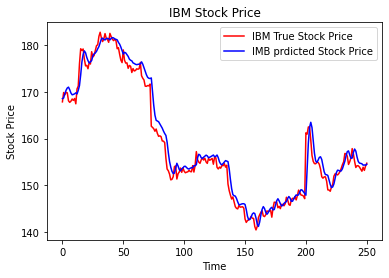

In [54]:
# 绘制测试结果和预测结果

plot_predictions(test_set, predict_stock_price)

### 基于GRU实现股价预测

In [62]:
model_gru = Sequential()

In [64]:
model_gru.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1), activation='tanh'))

In [66]:
model_gru.add(Dropout(0.2))

In [69]:
model_gru.add(GRU(50, activation='tanh'))

In [70]:
model_gru.add(Dropout(0.2))

In [71]:
model_gru.add(Dense(1))

In [72]:
# 模型编译
model_gru.compile(optimizer=SGD(lr=0.01, decay=1e-7, momentum=0.9), loss='mse')

In [73]:
# 训练
model_gru.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
85/85 [==============================] - 18s 209ms/step - loss: 0.0351
Epoch 2/20
85/85 [==============================] - 18s 217ms/step - loss: 0.0032
Epoch 3/20
85/85 [==============================] - 19s 224ms/step - loss: 0.0026
Epoch 4/20
85/85 [==============================] - 19s 225ms/step - loss: 0.0023
Epoch 5/20
85/85 [==============================] - 19s 221ms/step - loss: 0.0021
Epoch 6/20
85/85 [==============================] - 19s 225ms/step - loss: 0.0019
Epoch 7/20
85/85 [==============================] - 19s 226ms/step - loss: 0.0018
Epoch 8/20
85/85 [==============================] - 19s 223ms/step - loss: 0.0017
Epoch 9/20
85/85 [==============================] - 19s 229ms/step - loss: 0.0016
Epoch 10/20
85/85 [==============================] - 19s 227ms/step - loss: 0.0015
Epoch 11/20
85/85 [==============================] - 19s 226ms/step - loss: 0.0016
Epoch 12/20
85/85 [==============================] - 15s 177ms/step - loss: 0.0014
Epoch 13/20
8

In [74]:
# 准备测试集X_test,进行股价预测
X_test = []
for i in range(60, 311):
    X_test.append(inputs[i-60:i, 0])
    
X_test = np.array(X_test) # numpy 类型转换

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [75]:
GRU_predicted = model_gru.predict(X_test)

In [76]:
GRU_predicted_stock_price = sc.inverse_transform(GRU_predicted)

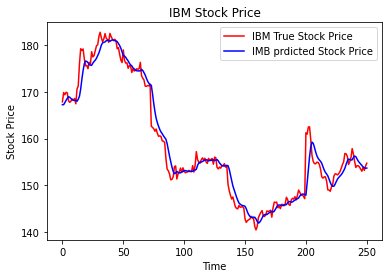

In [77]:
# 可视化
plot_predictions(test_set, GRU_predicted_stock_price)